# 10.2 Exercises: Time Series Analysis
# Rahul Rajeev

**12-1 Exercise:**   The linear model I used in this chapter has the obvious drawback that it is linear, and there is no reason to expect prices to change linearly over time. We can add flexibility to the model by adding a quadratic term, as we did in Section 11.3.

Use a quadratic model to fit the time series of daily prices, and use the model to generate predictions. You will have to write a version of `RunLinearModel` that runs that quadratic model, but after that you should be able to reuse code from the chapter to generate predictions.

In [53]:
# quadratic model
def RunQuadraticModel(daily):
    daily["years2"] = daily.years**2
    model = smf.ols("ppg ~ years + years2", data=daily)
    results = model.fit()
    return model, results

In [61]:
# running the quadratic model against the subset of high 
daily = dailies["high"]
model, results = RunQuadraticModel(daily)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ppg   R-squared:                       0.383
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     384.3
Date:                Fri, 17 Feb 2023   Prob (F-statistic):          1.50e-130
Time:                        23:36:56   Log-Likelihood:                -1695.9
No. Observations:                1241   AIC:                             3398.
Df Residuals:                    1238   BIC:                             3413.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     14.0147      0.078    179.402      0.000      13.861      14.168
years         -1.1599      0.098    -11.792      0.000      -1.353      -0.967
years2         0.1233      0.026      4.695      0.000       0.072       0.175
==============================================================================
Omnibus:                       93.984   Durbin-Watson:                   1.832
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              141.436
Skew:                           0.587   Prob(JB):                     1.94e-31
Kurtosis:                       4.164   Cond. No.                         27.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

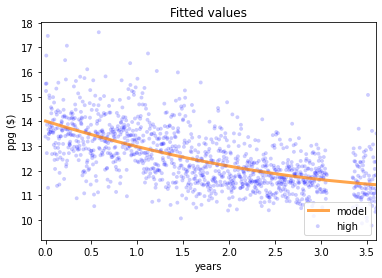

In [68]:
# plotting the fitted line against the values

PlotFittedValues(model, results, label=name)
thinkplot.Config(
    title="Fitted values", xlabel="years", xlim=[-0.05, 3.6], ylabel="ppg ($)"
)

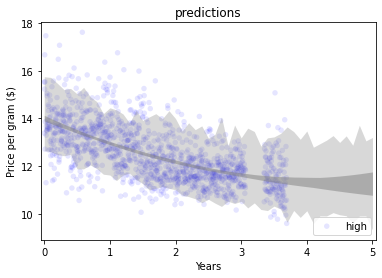

In [67]:
# creating a list of year values from 0 to 5 split into 51
years = np.linspace(0, 5, 51)

# plotting the values against the predicted values
thinkplot.Scatter(daily.years, daily.ppg, alpha=0.1, label=name)
PlotPredictions(daily, years, func=RunQuadraticModel)

# config
thinkplot.Config(
    title="predictions",
    xlabel="years",
    xlim=[years[0] - 0.05, years[-1] + 0.05],
    ylabel=" ppg ($)",
)

**12-2 Exercise:** Write a definition for a class named `SerialCorrelationTest` that extends `HypothesisTest` from Section 9.2. It should take a series and a lag as data, compute the serial correlation of the series with the given lag, and then compute the p-value of the observed correlation.

Use this class to test whether the serial correlation in raw price data is statistically significant. Also test the residuals of the linear model and (if you did the previous exercise), the quadratic model.

In [74]:
# creating the serial correlation test class

class SerialCorrelationTest(thinkstats2.HypothesisTest):
    def TestStatistic(self, data):
        series, lag = data
        test_stat = abs(SerialCorr(series, lag))
        return test_stat

    def RunModel(self):
        series, lag = self.data
        permutation = series.reindex(np.random.permutation(series.index))
        return permutation, lag

In [78]:
# correlation between consecutive price data

daily = dailies['high']
dailyseries = daily.ppg
test1 = SerialCorrelationTest((dailyseries, 1))
pvalue = test1.PValue()
print(test1.actual, pvalue)

0.4334924697283193 0.0


In [79]:
# serial correlation in the residuals of the linear model

_, linearresults = RunLinearModel(daily)
residseries1 = results.resid
test2 = SerialCorrelationTest((residseries1, 1))
pvalue2 = test2.PValue()
print(test2.actual, pvalue2)

0.09918396905406068 0.001


In [80]:
# serial correlation in the residuals of the quadratic model

_, quadresults = RunQuadraticModel(daily)
residseries2 = results.resid
test3 = SerialCorrelationTest((residseries2, 1))
pvalue3 = test3.PValue()
print(test3.actual, pvalue3)

0.09918396905406068 0.0
